In [ ]:
# Antonio Marcio Crepaldi Junior - 21012485
# Bianca Aparecida Andrade - 21007245
# Eduardo Augusto Marras de Souza - 20078408
# Lucas de Sousa Marcato - 21003317

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
sns.set(style='whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/DataSet_Pizza.csv')

In [ ]:
linhas_originais = df.shape
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [ ]:
df.isnull().sum()

brand     0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

Como podemos observar acima, não há valors nulos no dataset.

In [ ]:
df = df.drop_duplicates()
print(df.head())
linhas_depois = df.shape

  brand   mois   prot    fat   ash  sodium  carb   cal
0     A  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2     A  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3     A  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4     A  30.49  21.28  41.65  4.82    1.64  1.76  4.67


In [ ]:
print("Quantidade de linhas duplicadas excluidas:",linhas_originais[0]-linhas_depois[0])

Quantidade de linhas duplicadas excluidas: 5


Nós removemos as linhas que continham os valores duplicados.Com isso, finalizamos o pré-processamento.

Escolhemos a varaivel carb

In [ ]:
carb = df['cal']

In [ ]:
from scipy.stats import shapiro

# Teste de Shapiro-WilkS
stat, p = shapiro(carb)

# Interpretando o resultado
alpha = 0.05
print("Valor de p: ", p)
if p > alpha:
    print("A amostra parece ser normal (não podemos rejeitar H0)")
else:
    print("A amostra não parece ser normal (rejeitamos H0)")


Valor de p:  1.027708842506192e-12
A amostra não parece ser normal (rejeitamos H0)


In [ ]:
import pandas as pd
from scipy.stats import boxcox

# Aplicar a transformação Box-Cox
carb_t, fitted_lambda = boxcox(carb)


In [ ]:
from scipy.stats import shapiro

# Teste de Shapiro-WilkS
stat, p = shapiro(carb_t)

# Interpretando o resultado
alpha = 0.05
print("Valor de p: ", p)
if p > alpha:
    print("A amostra parece ser normal (não podemos rejeitar H0)")
else:
    print("A amostra não parece ser normal (rejeitamos H0)")


Valor de p:  1.2470179171941709e-05
A amostra não parece ser normal (rejeitamos H0)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

colunas = ['prot', 'fat', 'ash', 'sodium', 'carb', 'cal']
dados = df[colunas]

# Normalizando os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados)

# Aplicando PCA
pca = PCA()  # Você pode ajustar o número de componentes aqui
componentes_principais = pca.fit_transform(dados_normalizados)

# Criando um DataFrame para os componentes principais
pca_df = pd.DataFrame(data=componentes_principais, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'])

# Variância explicada
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", sum(pca.explained_variance_ratio_))



Variância explicada por cada componente: [6.92673458e-01 2.41425636e-01 4.75451711e-02 1.37119068e-02
 4.61652052e-03 2.73076563e-05]
Variância total explicada: 1.0


Apenas duas componentes ja seriam suficientes para representar pelo menos 80% dos dados.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

# Suponha que df é o seu DataFrame original e contém as colunas desejadas
dados = df[['prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]

# Normalizar os dados
dados_normalizados = scale(dados)

# Aplicar PCA
pca = PCA()
resultado_pca = pca.fit_transform(dados_normalizados)

# Criar DataFrame com os componentes principais que deseja visualizar
# Vamos assumir que você quer os três primeiros componentes
resultado = pd.DataFrame({
    'cp1': resultado_pca[:, 0],
    'cp2': resultado_pca[:, 1],
    'cp3': resultado_pca[:, 2]
})

#coeficientes dos CPs (autovetores)
#cada linha é um CP
pca.components_


array([[ 0.3707694 ,  0.45433161,  0.46881594,  0.44185722, -0.41415055,
         0.26375362],
       [ 0.44942922, -0.28462935,  0.18219297, -0.26723171, -0.4123374 ,
        -0.66510925],
       [ 0.67759837, -0.06565086, -0.08369725, -0.46973983,  0.25363445,
         0.49452932],
       [ 0.10872627, -0.52451115,  0.54097427,  0.38265791,  0.52248572,
        -0.03154517],
       [-0.38577904,  0.17407417,  0.6688481 , -0.60519463,  0.01084427,
         0.08447955],
       [-0.20188363, -0.63470082, -0.00107551,  0.00251051, -0.56658436,
         0.48515212]])

In [ ]:
autovetores = pca.components_

# Criar um DataFrame para os autovetores
autovetores_df = pd.DataFrame(autovetores, columns=['prot', 'fat', 'ash', 'sodium', 'carb', 'cal'])

# Mostrar os autovetores
print("Autovetores (Loadings):")
print(autovetores_df)

Autovetores (Loadings):
       prot       fat       ash    sodium      carb       cal
0  0.370769  0.454332  0.468816  0.441857 -0.414151  0.263754
1  0.449429 -0.284629  0.182193 -0.267232 -0.412337 -0.665109
2  0.677598 -0.065651 -0.083697 -0.469740  0.253634  0.494529
3  0.108726 -0.524511  0.540974  0.382658  0.522486 -0.031545
4 -0.385779  0.174074  0.668848 -0.605195  0.010844  0.084480
5 -0.201884 -0.634701 -0.001076  0.002511 -0.566584  0.485152


**CP1:** Altos valores positivos na CP1 indicam massas com bastante proteina, gordura, cinzas e sódio. Enquanto altos valores negativos indicam massas com bastante carboidrato.

**CP2:** Altos valores positivos na CP2 indicam alta quantidade de proteinas. Enquanto altos valores negativos indicam massas com bastante carboidratos e calorias.

**CP3:** Altos valores positivos na CP3 indicam alta quantidade de proteinas e calorias. Enquanto altos valores negativos indicam massas com bastante sódio.
  
**CP4** Altos valores positivos na CP4 indicam alta quantidade de cinzas e carboidratos. Enquanto altos valores negativos indicam massas com bastante gordura.

**CP5:** Altos valores positivos na CP5 indicam alta quantidade de cinzas. Enquanto altos valores negativos indicam massas com bastante sódio e proteinas.

**CP6:** Altos valores positivos na CP6 indicam alta quantidade de calorias. Enquanto altos valores negativos indicam massas com bastante carboidratos e gorduras.

In [ ]:
df.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67


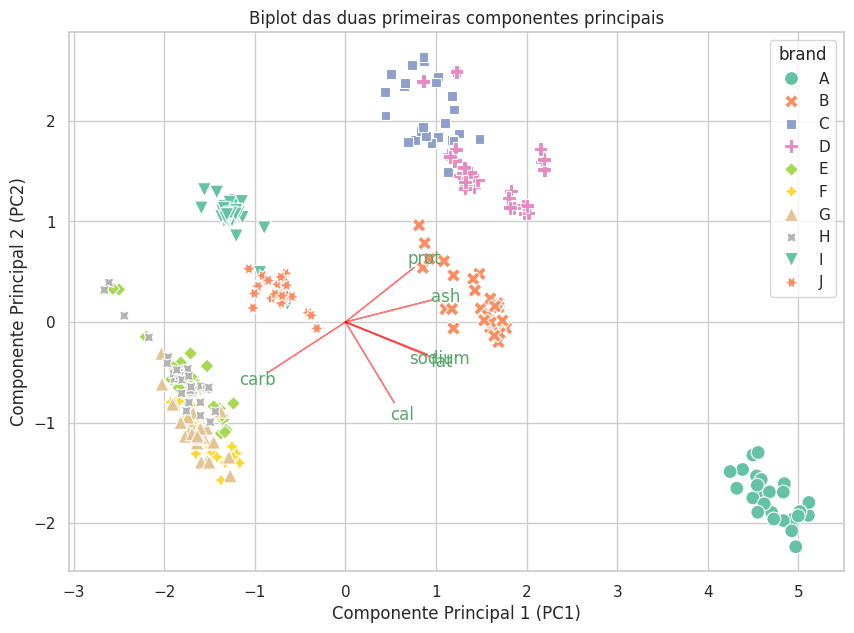

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_df['brand'] = df['brand']

# Criando o biplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='brand', style='brand', palette='Set2', s=100)

plt.title('Biplot das duas primeiras componentes principais')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')

# Adicionar as setas de carga
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = ['prot', 'fat', 'ash', 'sodium', 'carb', 'cal']
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, color='g', ha='center', va='center')

plt.grid(True)
plt.show()


**Insight interessante:** A marca C se destaca com massas com bastante proteina valores médios de gordura, cinzas e sódio e poucos carboidratos e calorias. Caracterizando assim essa pizza, uma ótima opção para comer numa dieta cetogenica, devido seu baixo indice de carboidratos e alto nivel de gorduras e proteinas.